In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
from scipy.stats import linregress
import os
from netCDF4 import Dataset 

In [4]:
# Import and apply style file for plots
plt.style.use("mpl.style")

In [5]:
#Compile all filenames (value) and properties (key) into a dictionary
def generate_file_names(filepath):
    data_files = {}

    for file in os.listdir(filepath):

        #Remove the .nc extension
        #Collect the info for the run in an array
        file_info = file.split(".")
        file_info = file_info[0].split("_")

        #File name
        file_name = file

        #Add the files to datafiles dictionary
        data_files[(file_info[0],file_info[1],file_info[2])]= filepath + "/" + file_name
    return data_files

In [12]:
#System dimensions
outer_R = 10
R = 9

#Scaling parameters
sf = 0.25
nb =1
n = nb/sf**2

#External Force
f_ext = 1e-2/n

#Viscosity parameters
eta = 1
gd0 = 1e-3
npow=0.5
k = eta*gd0**(1-npow)
model = "power"

#Avg velocity at channel exit u_z(r,z=0) for non-dimensionalization (function of R only)
u_z_0 = 5/3/R*(R-(3/5)*R**(5/3))

#Compressibility
target_B = 0.01 #Incompressible: 0, weakly compressible: 0.01, compressible: 0.1 
beta = target_B/k*(R/u_z_0)**npow #Isothermal compressibility factor
B = beta*k*(u_z_0/R)**npow #Compressibility number

frame = -1

In [13]:
filepath = '/home/epalermo/dev/test/poiseuille_flow/1_2_4.nc'
ds = Dataset(filepath)

In [32]:
#Analytical solution for Newtonian Poiseuille Flow in 2D rectangular channel 
def calc_analytical_profile(r,t,model):
    f = f_ext*t

    if model == "constant":
        u_z_cylinder = 0.5/(eta*R**2)*(1-(r/R)**2) #velocity is a function of r        
        u_z_rectangle = 0.25/eta*(R**2-r**2)
    return u_z_cylinder, u_z_rectangle

#Analytical solution for Newtonian Poiseuille Flow in 2D cylindrical channel 
# def calc_analytical_profile(r,t):
#     u_x = 0.25/eta*(inner_R**2-r**2) #velocity is a function of r
#     f = f_ext*t #external force is a function of t
#     return u_x*f




In [28]:
#list of all atoms
atom_ids = (ds["id"][frame])
#list of flow atoms
flow_atom_ids = []

#iterate over each atom
for count, atom in enumerate(atom_ids):
    if ds["type"][frame,atom-1]==1:
        flow_atom_ids.append(atom)


t_dump = ds["time"][frame]
t_step = t_dump

u_z = np.zeros(shape=len(flow_atom_ids))
r = np.zeros(shape=len(flow_atom_ids))
for count, atom in enumerate(flow_atom_ids):
    r[count] = ds["coordinates"][frame,atom-1,1]
    u_z[count] = ds["velocities"][frame,atom-1,0]

In [33]:
u_z_cyl, u_z_rect = calc_analytical_profile(r, t_step,"constant")

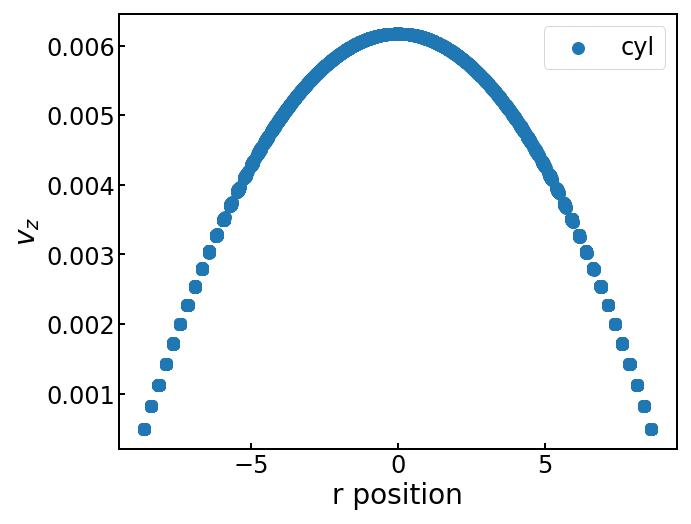

In [36]:
plt.scatter(r,u_z_cyl,label="cyl")
#plt.scatter(r,u_z_rect,label="rect")

plt.ylabel(r"$v_z$")
plt.xlabel("r position")
plt.legend()